# BEATS DMM commissioning
## Vertical 0mm references
Find the vertical zeroes for different items with respect to the beam

______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   17/09/2023

Last update:  23/11/2023
______________________________________________________


In [1]:
# import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tifffile
# import scipy as sc
# from scipy import conastants
# import dxchange
# from pandas_ods_reader import read_ods
# import h5py

In [2]:
from DMM.commissioning.tomoalign_simple import image_fit_profile

In [3]:
# plt.style.use('seaborn-v0_8-talk')
# plt.style.use('seaborn-v0_8-notebook')
# plt.style.use('tableau-colorblind10')
# plt.style.use('default')

In [3]:
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)

Settings

In [4]:
work_dir = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/'

# 1. Beam center with respect to detector
Read flat field image with slits open and apply `pseudo-voigt` fit

In [121]:
# im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/flat_FLIR_2X_slits1_open_test_det+0.5mm.tif')
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_slits1_Y1_5.245_Y2_0.136_flat.tif')

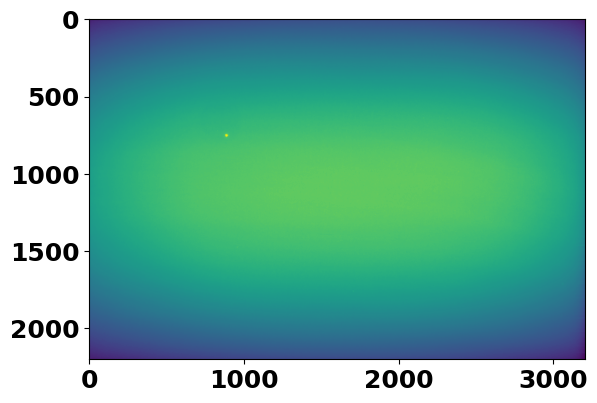

In [122]:
plt.imshow(im)

Let's crop the center of the image to remove a bright spot on the scintillator

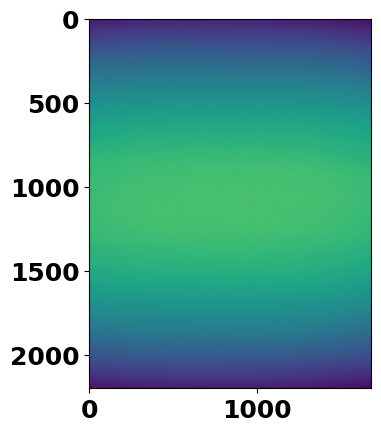

In [123]:
plt.imshow(im[:,920:2600])

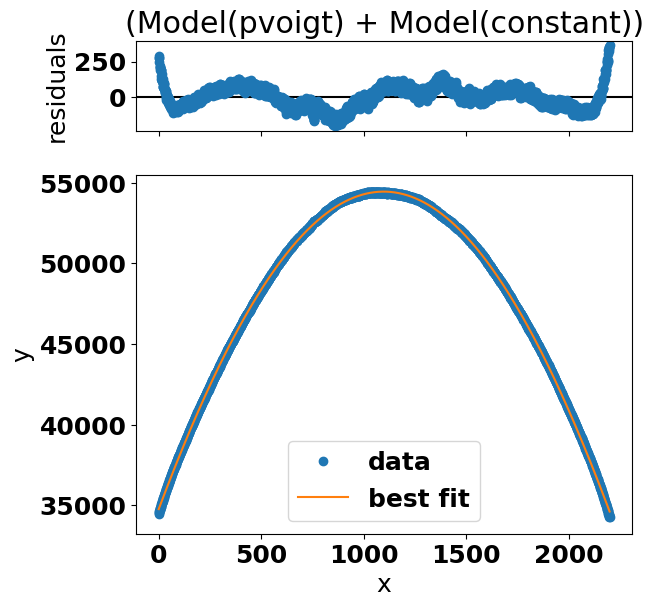

In [124]:
# image_fit_profile(im[:,920:2600], profile='pseudo-voigt', plot=True) # , width=1400
image_fit_profile(im, profile='pseudo-voigt', background='constant', plot=True) # , width=1400

In [125]:
fit_center = 1097
pixelsize = 4.5/2.1 # [um]
print('pixelsize: {0} [micron]'.format(pixelsize))
print('image center: {0} [pixels]'.format(im.shape[0]/2))
print('fit center: {0} [pixls]'.format(fit_center))

pixelsize: 2.142857142857143 [micron]
image center: 1100.0 [pixels]
fit center: 1097 [pixls]


The detector is centered vertically to the beam..

# 2. Vertical center of Slit_1

In [126]:
# im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/flat_FLIR_2X_slits1_open_test_det+0.5mm.tif')
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_slits1_Y1_5.245_Y2_0.136.tif')

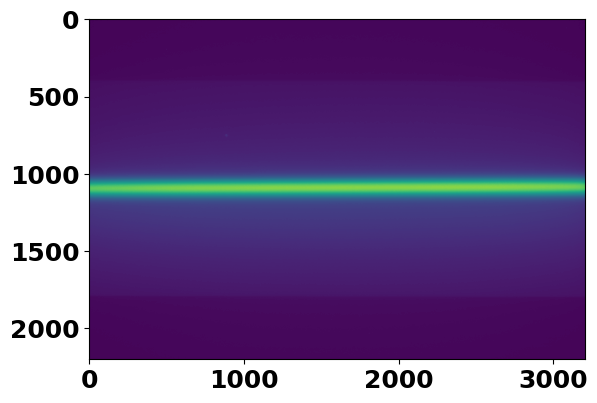

In [127]:
plt.imshow(im)

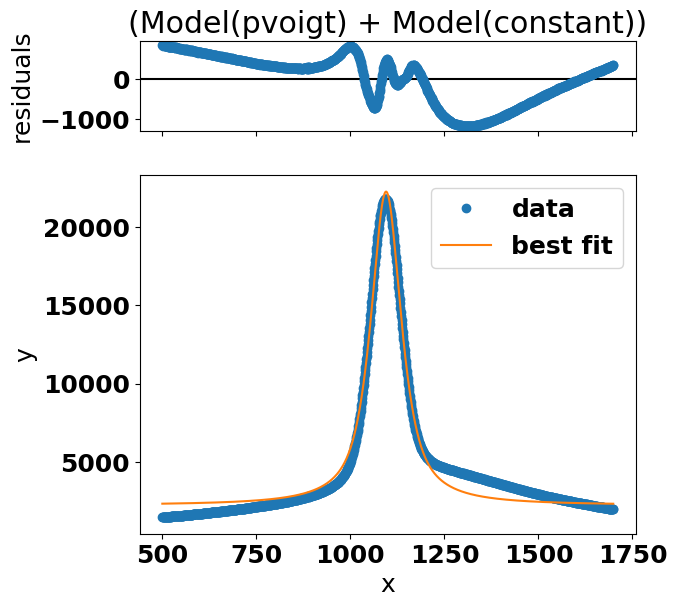

In [130]:
image_fit_profile(im, profile='pseudo-voigt', background='constant', trim=500, plot=True) # , width=1400

In [133]:
fit_center = 1094.92
beam_center = 1097.28
pixelsize = 4.5/2.1 # [um]
Y_difference = fit_center-beam_center
Y_difference_mm = 1e-3*pixelsize*(fit_center-beam_center)
Slits1_Z = 8685 # [mm]
Det_Z = 43640 # [mm]
Slits1_deltaY1 = Y_difference_mm*(Slits1_Z/Det_Z)

print('pixelsize: {0} [micron]'.format(pixelsize))
print('image center: {0} [pixels]'.format(im_center))
print('fit center: {0} [pixels]'.format(fit_center))
print('Difference: {0} [pixels]; {1} [mm] (Slits_1 center is too high)'.format(Y_difference, Y_difference_mm))
print('Slits1_Y delta: {0} [mm]'.format(Slits1_deltaY1))

pixelsize: 2.142857142857143 [micron]
image center: 1100.0 [pixels]
fit center: 1094.92 [pixels]
Difference: -2.3599999999999 [pixels]; -0.005057142857142643 [mm] (Slits_1 center is too high)
Slits1_Y delta: -0.0010064455938195202 [mm]


## New Slits_1 center:
    - Slits1_Y1 = 5.244 mm
    - Slits1_Y2 = 0.135 mm

---
### Slits_1 is completely closed at:
    - Slits1_Y1 = 5.250 mm
    - Slits1_Y2 = 0.129 mm


# 3. Vertical center of DMM ML1

In [78]:
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_ML1_Y0_pitch0.tif')
im_flat = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_ML1_Y0_pitch0_flat.tif')

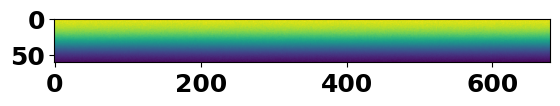

In [93]:
plt.imshow(im[1080:1140,1920:2600]/im_flat[1080:1140,1920:2600])

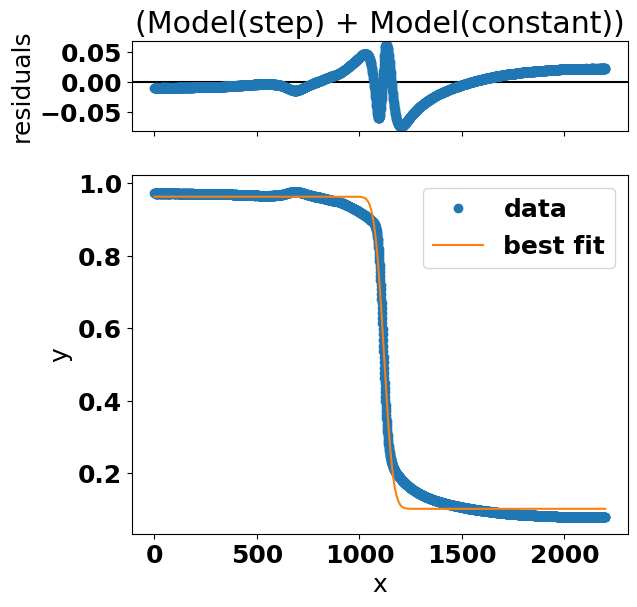

In [88]:
image_fit_profile(im[:,920:2600]/im_flat[:,920:2600], profile='step', background='constant', plot=True) # , width=1400

In [98]:
fit_center = 1119.34
im_center = im.shape[0]/2
pixelsize = 4.5/2.1 # [um]
ML1_Y0 = 1.259
Y_difference = fit_center-im.shape[0]/2
Y_difference_mm = 1e-3*pixelsize*(fit_center-im.shape[0]/2)
ML1_Z = 15165 # [mm]
Det_Z = 43640 # [mm]
ML1_Y1 = ML1_Y0 + Y_difference_mm*(ML1_Z/Det_Z)

print('pixelsize: {0} [micron]'.format(pixelsize))
print('image center: {0} [pixels]'.format(im_center))
print('fit center: {0} [pixels]'.format(fit_center))
print('Difference: {0} [pixels]; {1} [mm] (ML1 is too low)'.format(Y_difference, Y_difference_mm))
print('New ML1_Y: {0} [mm]'.format(ML1_Y1))

pixelsize: 2.142857142857143 [micron]
image center: 1100.0 [pixels]
fit center: 1119.34 [pixels]
Difference: 19.339999999999918 [pixels]; 0.04144285714285697 [mm] (ML1 is too low)
New ML1_Y: 1.2734014878224431 [mm]


## 3.1 Check results after correction

In [95]:
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_ML1_Y1.273mm_pitch0.009deg.tif')
im_flat = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_ML1_Y1.273mm_pitch0.009deg_flat.tif')

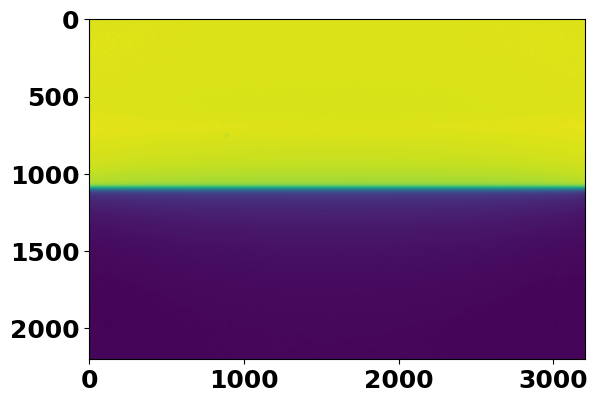

In [96]:
plt.imshow(im/im_flat)

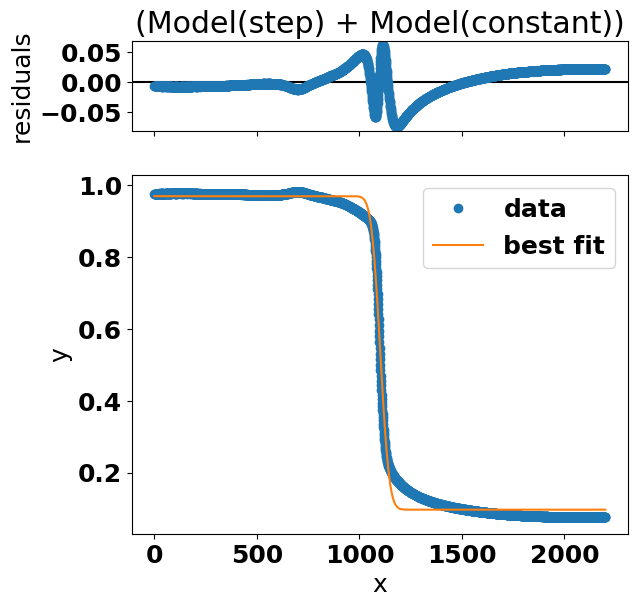

In [97]:
image_fit_profile(im/im_flat, profile='step', background='constant', plot=True) # , width=1400

# 4. Vertical center of DMM ML2

In [99]:
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_ML2_Y1.068mm_pitch0.001deg.tif')
im_flat = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_ML2_Y1.068mm_pitch0.001deg_flat.tif')

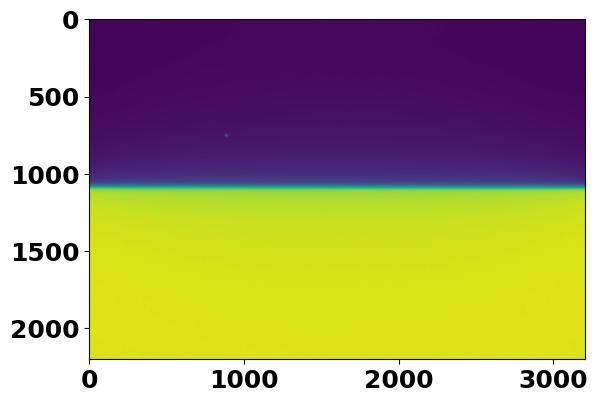

In [100]:
plt.imshow(im/im_flat)

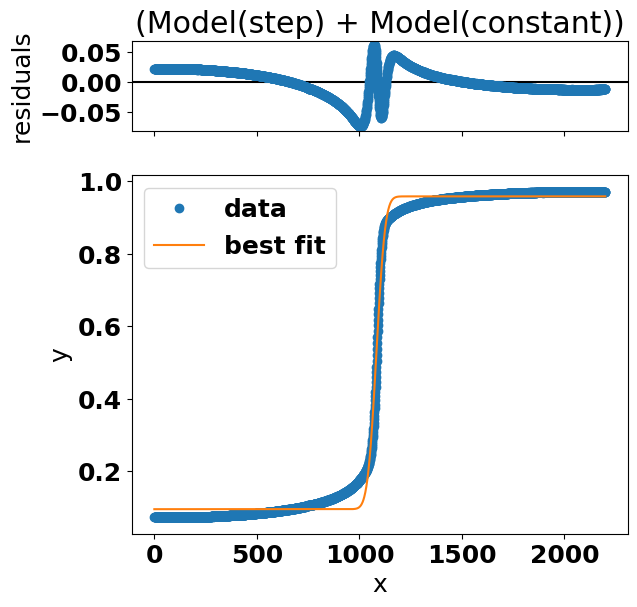

In [101]:
image_fit_profile(im/im_flat, profile='step', background='constant', plot=True) # , width=1400

In [102]:
fit_center = 1083.11
im_center = im.shape[0]/2
pixelsize = 4.5/2.1 # [um]
ML2_Y0 = 1.068
Y_difference = fit_center-im.shape[0]/2
Y_difference_mm = 1e-3*pixelsize*(fit_center-im.shape[0]/2)
ML2_Z = 16165 # [mm]
Det_Z = 43640 # [mm]
ML2_Y1 = ML2_Y0 + Y_difference_mm*(ML2_Z/Det_Z)

print('pixelsize: {0} [micron]'.format(pixelsize))
print('image center: {0} [pixels]'.format(im_center))
print('fit center: {0} [pixels]'.format(fit_center))
print('Difference: {0} [pixels]; {1} [mm] (ML2 is too high)'.format(Y_difference, Y_difference_mm))
print('New ML2_Y: {0} [mm]'.format(ML2_Y1))

pixelsize: 2.142857142857143 [micron]
image center: 1100.0 [pixels]
fit center: 1083.11 [pixels]
Difference: -16.8900000000001 [pixels]; -0.03619285714285736 [mm] (ML2 is too high)
New ML2_Y: 1.054593548677491 [mm]


## 4.1 Check results after correction

In [103]:
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_ML2_Y1.055mm_pitch0.001deg.tif')
im_flat = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_ML2_Y1.055mm_pitch0.001deg_flat.tif')

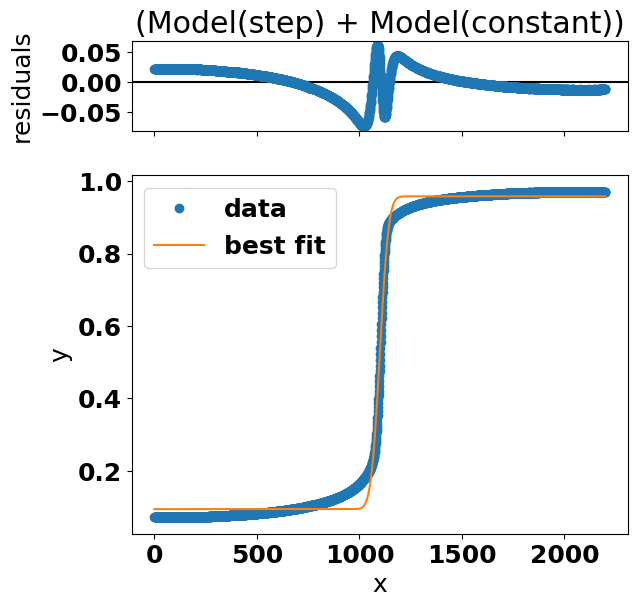

In [104]:
image_fit_profile(im/im_flat, profile='step', background='constant', plot=True) # , width=1400

# 5. Vertical center of White Beam Blocker (WBB)

In [105]:
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_WBB_Y6.93mm.tif')
im_flat = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_WBB_Y6.93mm_flat.tif')

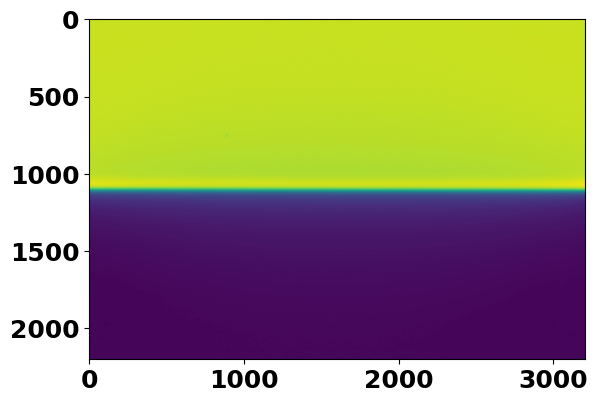

In [106]:
plt.imshow(im/im_flat)

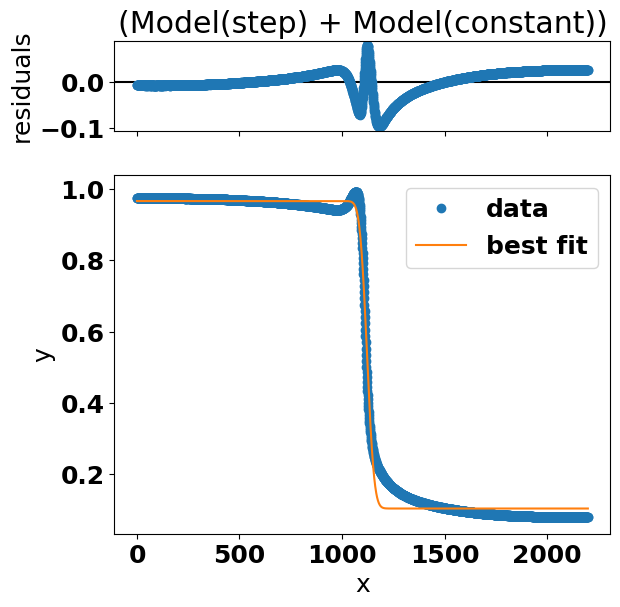

In [107]:
image_fit_profile(im/im_flat, profile='step', background='constant', plot=True) # , width=1400

In [110]:
fit_center = 1122.09
im_center = im.shape[0]/2
pixelsize = 4.5/2.1 # [um]
WBB_Y0 = 6.93 #[mm]
Y_difference = fit_center-im.shape[0]/2
Y_difference_mm = 1e-3*pixelsize*(fit_center-im.shape[0]/2)
WBB_Z = 17265 # [mm]
Det_Z = 43640 # [mm]
WBB_Y1 = WBB_Y0 + Y_difference_mm*(WBB_Z/Det_Z)

print('pixelsize: {0} [micron]'.format(pixelsize))
print('image center: {0} [pixels]'.format(im_center))
print('fit center: {0} [pixels]'.format(fit_center))
print('Difference: {0} [pixels]; {1} [mm] (WBB is too low)'.format(Y_difference, Y_difference_mm))
print('New WBB_Y: {0} [mm]'.format(WBB_Y1))

pixelsize: 2.142857142857143 [micron]
image center: 1100.0 [pixels]
fit center: 1122.09 [pixels]
Difference: 22.089999999999918 [pixels]; 0.04733571428571411 [mm] (WBB is too low)
New WBB_Y: 6.948727110612806 [mm]


# 6. Vertical center of Diagnostics Screen (also called WBmonitor)

In [111]:
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_WBmonitor_Y4.49mm.tif')
im_flat = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_WBB_Y6.93mm_flat.tif')

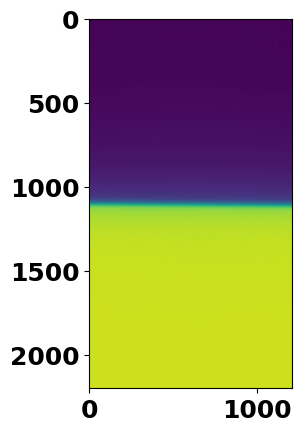

In [113]:
plt.imshow(im[:,1000:2208]/im_flat[:,1000:2208])

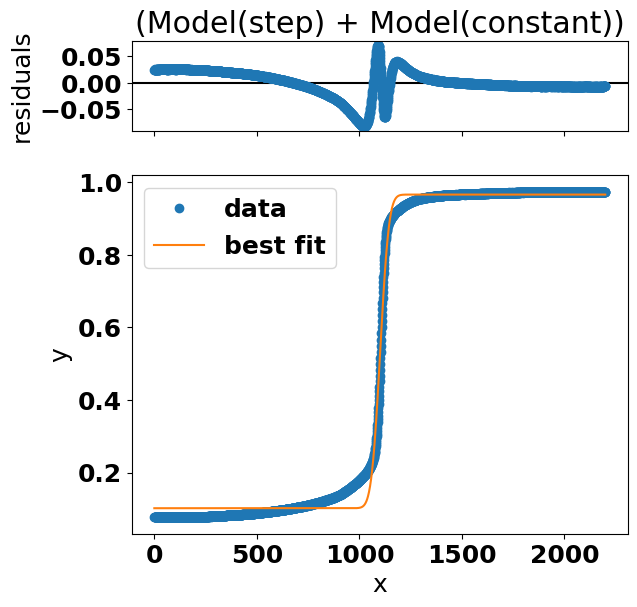

In [114]:
image_fit_profile(im[:,1000:2208]/im_flat[:,1000:2208], profile='step', background='constant', plot=True) # , width=1400

WBmonitor 0 ref: 4.49 mm

# 7. Vertical center of Slit_3

In [116]:
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/FLIR_2X_slits3_Y1-0.41_Y20.22.tif')

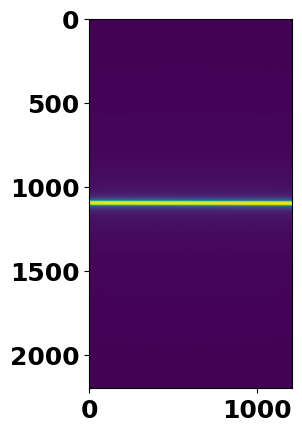

In [119]:
plt.imshow(im[:,1000:2208]) # /im_flat[:,1000:2208]

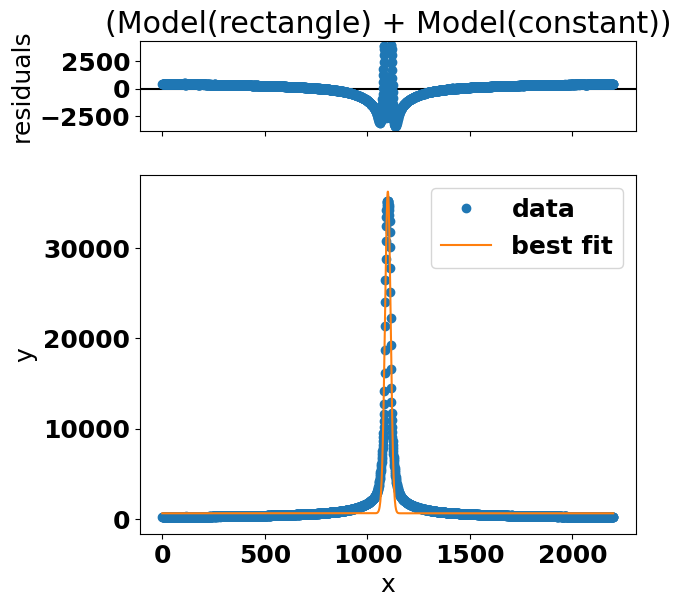

In [120]:
image_fit_profile(im, profile='rectangle', background='constant', plot=True) # , width=1400

## New Slits_3 center:
    - Slits3_Y1 = -0.41 mm
    - Slits3_Y2 = 0.22 mm

---
### Slits_3 is completely closed at:
    - Slits3_Y1 = -0.44 mm
    - Slits3_Y2 = 0.19 mm
